In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [94]:
data_path = r"C:\Users\elena.nardi\Documents\Python Scripts\Invistico_Airline.csv"

In [95]:
data = pd.read_csv(data_path)

In [96]:
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [102]:
data.satisfaction.value_counts(normalize=True)

satisfied       0.547328
dissatisfied    0.452672
Name: satisfaction, dtype: float64

In [7]:
sample = data.sample(10000)
sample.satisfaction.value_counts(normalize=True)

satisfied       0.5496
dissatisfied    0.4504
Name: satisfaction, dtype: float64

In [8]:
data = sample
sample.satisfaction.value_counts(normalize=True)

satisfied       0.5496
dissatisfied    0.4504
Name: satisfaction, dtype: float64

In [98]:
data.Gender.value_counts(normalize=True)

Female    0.507384
Male      0.492616
Name: Gender, dtype: float64

In [10]:
data.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000,9975.000000
mean,39.116700,1989.985000,2.845500,2.974300,2.859400,2.987500,3.251200,3.387800,3.510400,3.467100,3.451600,3.511500,3.68090,3.330100,3.69410,3.350400,14.690800,14.898145
std,15.120964,1037.265427,1.388893,1.525081,1.430537,1.292637,1.319194,1.338652,1.313722,1.303797,1.276409,1.285859,1.16233,1.268659,1.15925,1.297454,41.448648,41.685422
min,7.000000,50.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.00000,0.000000,1.00000,0.000000,0.000000,0.000000
25%,27.000000,1360.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.00000,3.000000,3.00000,2.000000,0.000000,0.000000
50%,39.000000,1921.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,3.000000,4.00000,4.000000,0.000000,0.000000
75%,50.000000,2568.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.00000,4.000000,5.00000,4.000000,12.250000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.00000,5.000000,1592.000000,1584.000000


In [11]:
data.isnull().values.any()

True

In [12]:
data.dtypes.value_counts()

int64      17
object      5
float64     1
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder #tranforming the categorical features in numerical
le = LabelEncoder()
data['satisfaction'] = le.fit_transform(data.satisfaction)
     

In [14]:
data['satisfaction'].value_counts()

1    5496
0    4504
Name: satisfaction, dtype: int64

In [15]:
objects = data.select_dtypes(include=['object'])
for label in objects.columns:
    data[label]=le.fit_transform(data[label]) #transofrm categorical variables into numericals
    
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
32773,1,1,0,9,1,1,1891,4,2,3,...,5,5,4,4,3,1,3,5,1,0.0
74685,0,1,0,64,0,0,2704,2,3,3,...,4,2,2,2,2,1,2,1,15,11.0
67864,0,1,0,25,0,1,3571,1,5,5,...,1,2,3,3,3,1,2,1,0,4.0
51421,0,0,1,38,0,1,1877,3,1,3,...,1,4,2,1,4,1,4,4,0,0.0
117811,1,0,0,26,0,0,3674,5,5,5,...,5,5,5,4,4,3,5,5,19,7.0


In [16]:
data.dtypes

satisfaction                           int32
Gender                                 int32
Customer Type                          int32
Age                                    int64
Type of Travel                         int32
Class                                  int32
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

In [17]:
data.fillna(data.mean(), inplace=True)
data.isnull().values.any()

False

In [18]:
data= data.astype(float)
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
32773,1.0,1.0,0.0,9.0,1.0,1.0,1891.0,4.0,2.0,3.0,...,5.0,5.0,4.0,4.0,3.0,1.0,3.0,5.0,1.0,0.0
74685,0.0,1.0,0.0,64.0,0.0,0.0,2704.0,2.0,3.0,3.0,...,4.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,15.0,11.0
67864,0.0,1.0,0.0,25.0,0.0,1.0,3571.0,1.0,5.0,5.0,...,1.0,2.0,3.0,3.0,3.0,1.0,2.0,1.0,0.0,4.0
51421,0.0,0.0,1.0,38.0,0.0,1.0,1877.0,3.0,1.0,3.0,...,1.0,4.0,2.0,1.0,4.0,1.0,4.0,4.0,0.0,0.0
117811,1.0,0.0,0.0,26.0,0.0,0.0,3674.0,5.0,5.0,5.0,...,5.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,19.0,7.0


In [19]:
# The correlation matrix
corr_mat = data.corr()

# Strip out the diagonal values for the next step
for x in range(len(corr_mat)):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
satisfaction,0.000000,-0.217966,-0.287094,0.119857,-0.116038,-0.289381,-0.044109,0.230414,-0.013543,0.113072,...,0.394108,0.421925,0.336838,0.292124,0.252265,0.274850,0.254748,0.334503,-0.064757,-0.067622
Gender,-0.217966,0.000000,-0.010591,0.002761,0.008029,-0.004808,0.117179,-0.068414,0.054896,-0.051182,...,-0.091446,-0.076963,-0.051358,-0.071877,0.000863,-0.024534,-0.008888,-0.053399,-0.000647,-0.004788
Customer Type,-0.287094,-0.010591,0.000000,-0.287287,-0.306008,0.053321,0.017345,-0.031058,-0.187912,-0.036370,...,-0.185167,-0.148843,-0.077497,-0.088440,-0.007712,-0.058495,0.002983,-0.110508,0.009653,0.009292
Age,0.119857,0.002761,-0.287287,0.000000,-0.039716,-0.121488,-0.246743,0.012197,0.045914,0.016409,...,0.111220,0.067712,0.065471,0.056658,-0.021388,0.032525,-0.026199,0.031315,-0.004783,-0.007854
Type of Travel,-0.116038,0.008029,-0.306008,-0.039716,0.000000,0.470507,-0.129110,0.008347,0.185194,-0.036898,...,-0.031450,-0.035502,0.022149,0.011893,0.030939,0.055958,0.045958,-0.007879,-0.011505,-0.013481
Class,-0.289381,-0.004808,0.053321,-0.121488,0.470507,0.000000,-0.158995,0.033615,0.043276,-0.045840,...,-0.172805,-0.123357,-0.157085,-0.116509,-0.135950,-0.146546,-0.131867,-0.090059,0.004931,0.005221
Flight Distance,-0.044109,0.117179,0.017345,-0.246743,-0.129110,-0.158995,0.000000,-0.053555,-0.003421,-0.014370,...,-0.029415,-0.026455,-0.039336,-0.027397,0.022985,0.014839,0.014393,-0.000239,0.106033,0.105552
Seat comfort,0.230414,-0.068414,-0.031058,0.012197,0.008347,0.033615,-0.053555,0.000000,0.442326,0.718278,...,0.111847,0.207697,0.116535,0.130269,0.123963,0.043364,0.102700,0.127667,-0.019036,-0.021872
Departure/Arrival time convenient,-0.013543,0.054896,-0.187912,0.045914,0.185194,0.043276,-0.003421,0.442326,0.000000,0.530967,...,0.000108,-0.003418,0.060730,0.034804,0.069451,0.069308,0.058683,-0.006720,0.006541,0.005284
Food and drink,0.113072,-0.051182,-0.036370,0.016409,-0.036898,-0.045840,-0.014370,0.718278,0.530967,0.000000,...,0.022331,0.046851,0.056193,0.067699,0.045011,0.032244,0.038349,0.012644,-0.016581,-0.017260


In [20]:
# Pairwise maximal correlations
corr_mat.abs().idxmax()

satisfaction                                    Inflight entertainment
Gender                                                    satisfaction
Customer Type                                           Type of Travel
Age                                                      Customer Type
Type of Travel                                                   Class
Class                                                   Type of Travel
Flight Distance                                                    Age
Seat comfort                                            Food and drink
Departure/Arrival time convenient                        Gate location
Food and drink                                            Seat comfort
Gate location                        Departure/Arrival time convenient
Inflight wifi service                                  Online boarding
Inflight entertainment                                    satisfaction
Online support                                         Online boarding
Ease o

In [21]:
skew_columns = (data
                .skew()
                .sort_values(ascending=False))


In [22]:
skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

Departure Delay in Minutes    11.602840
Arrival Delay in Minutes      11.373861
Customer Type                  1.646840
Type of Travel                 0.846691
dtype: float64

In [23]:
import numpy as np
# Perform log transform on skewed columns
for col in skew_columns.index.tolist():
    data[col] = 1/(1+data[col])


In [24]:
skew_columns = (data
                .skew()
                .sort_values(ascending=False))


skew_columns

Class                                0.545592
Flight Distance                      0.496476
Age                                  0.020385
Gender                               0.014403
Gate location                       -0.066248
Seat comfort                        -0.123730
Food and drink                      -0.142936
satisfaction                        -0.199413
Inflight wifi service               -0.212364
Departure/Arrival time convenient   -0.262424
Arrival Delay in Minutes            -0.330593
Departure Delay in Minutes          -0.350632
Online boarding                     -0.373637
Checkin service                     -0.375054
On-board service                    -0.495615
Ease of Online booking              -0.496662
Leg room service                    -0.523027
Online support                      -0.564073
Inflight entertainment              -0.603517
Baggage handling                    -0.741610
Cleanliness                         -0.743507
Type of Travel                    

In [25]:
data.describe()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,0.549600,0.496400,0.908900,39.116700,0.847450,0.597500,1989.985000,2.845500,2.974300,2.859400,...,3.510400,3.467100,3.451600,3.511500,3.68090,3.330100,3.69410,3.350400,0.613264,0.608921
std,0.497559,0.500012,0.193014,15.120964,0.230236,0.623645,1037.265427,1.388893,1.525081,1.430537,...,1.313722,1.303797,1.276409,1.285859,1.16233,1.268659,1.15925,1.297454,0.448528,0.450981
min,0.000000,0.000000,0.500000,7.000000,0.500000,0.000000,50.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.00000,0.000000,1.00000,0.000000,0.000628,0.000631
25%,0.000000,0.000000,1.000000,27.000000,0.500000,0.000000,1360.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,3.00000,3.000000,3.00000,2.000000,0.075549,0.071429
50%,1.000000,0.000000,1.000000,39.000000,1.000000,1.000000,1921.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,3.000000,4.00000,4.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,50.000000,1.000000,1.000000,2568.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,4.000000,5.000000,5.00000,4.000000,5.00000,4.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,85.000000,1.000000,2.000000,6951.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.00000,5.000000,1.000000,1.000000


In [26]:
y = data["satisfaction"]
data = data.drop(columns = "satisfaction")
y



32773     1.0
74685     0.0
67864     0.0
51421     0.0
117811    1.0
         ... 
119638    1.0
108298    1.0
21685     1.0
67031     0.0
119987    1.0
Name: satisfaction, Length: 10000, dtype: float64

In [27]:
from sklearn.preprocessing import RobustScaler
ss= RobustScaler()
data_scaled = pd.DataFrame(ss.fit_transform(data),columns = data.columns) 
data_scaled.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.496400,-0.091100,0.005074,-0.305100,-0.402500,0.057107,-0.077250,-0.012850,-0.070300,-0.006250,...,-0.244800,-0.177633,-0.548400,-0.244250,-0.159550,0.330100,-0.152950,-0.324800,-0.418342,-0.421162
std,0.500012,0.193014,0.657433,0.460473,0.623645,0.858663,0.694446,0.762541,0.715269,0.646319,...,0.656861,0.434599,1.276409,0.642929,0.581165,1.268659,0.579625,0.648727,0.485183,0.485672
min,0.000000,-0.500000,-1.391304,-1.000000,-1.000000,-1.548841,-1.500000,-1.500000,-1.500000,-1.000000,...,-2.000000,-1.333333,-3.000000,-2.000000,-1.500000,-3.000000,-1.500000,-2.000000,-1.081045,-1.076244
25%,0.000000,0.000000,-0.521739,-1.000000,-1.000000,-0.464404,-0.500000,-0.500000,-0.500000,-0.500000,...,-0.500000,-0.666667,-1.000000,-0.500000,-0.500000,0.000000,-0.500000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.478261,0.000000,0.000000,0.535596,0.500000,0.500000,0.500000,0.500000,...,0.500000,0.333333,0.000000,0.500000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000
max,1.000000,0.000000,2.000000,0.000000,1.000000,4.163907,1.000000,1.000000,1.000000,1.000000,...,0.500000,0.333333,1.000000,0.500000,0.500000,2.000000,0.500000,0.500000,0.000000,0.000000


In [28]:
data_scaled.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.496400,-0.091100,0.005074,-0.305100,-0.402500,0.057107,-0.077250,-0.012850,-0.070300,-0.006250,...,-0.244800,-0.177633,-0.548400,-0.244250,-0.159550,0.330100,-0.152950,-0.324800,-0.418342,-0.421162
std,0.500012,0.193014,0.657433,0.460473,0.623645,0.858663,0.694446,0.762541,0.715269,0.646319,...,0.656861,0.434599,1.276409,0.642929,0.581165,1.268659,0.579625,0.648727,0.485183,0.485672
min,0.000000,-0.500000,-1.391304,-1.000000,-1.000000,-1.548841,-1.500000,-1.500000,-1.500000,-1.000000,...,-2.000000,-1.333333,-3.000000,-2.000000,-1.500000,-3.000000,-1.500000,-2.000000,-1.081045,-1.076244
25%,0.000000,0.000000,-0.521739,-1.000000,-1.000000,-0.464404,-0.500000,-0.500000,-0.500000,-0.500000,...,-0.500000,-0.666667,-1.000000,-0.500000,-0.500000,0.000000,-0.500000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.478261,0.000000,0.000000,0.535596,0.500000,0.500000,0.500000,0.500000,...,0.500000,0.333333,0.000000,0.500000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000
max,1.000000,0.000000,2.000000,0.000000,1.000000,4.163907,1.000000,1.000000,1.000000,1.000000,...,0.500000,0.333333,1.000000,0.500000,0.500000,2.000000,0.500000,0.500000,0.000000,0.000000


In [29]:
data= data_scaled

#sns.pairplot(data)

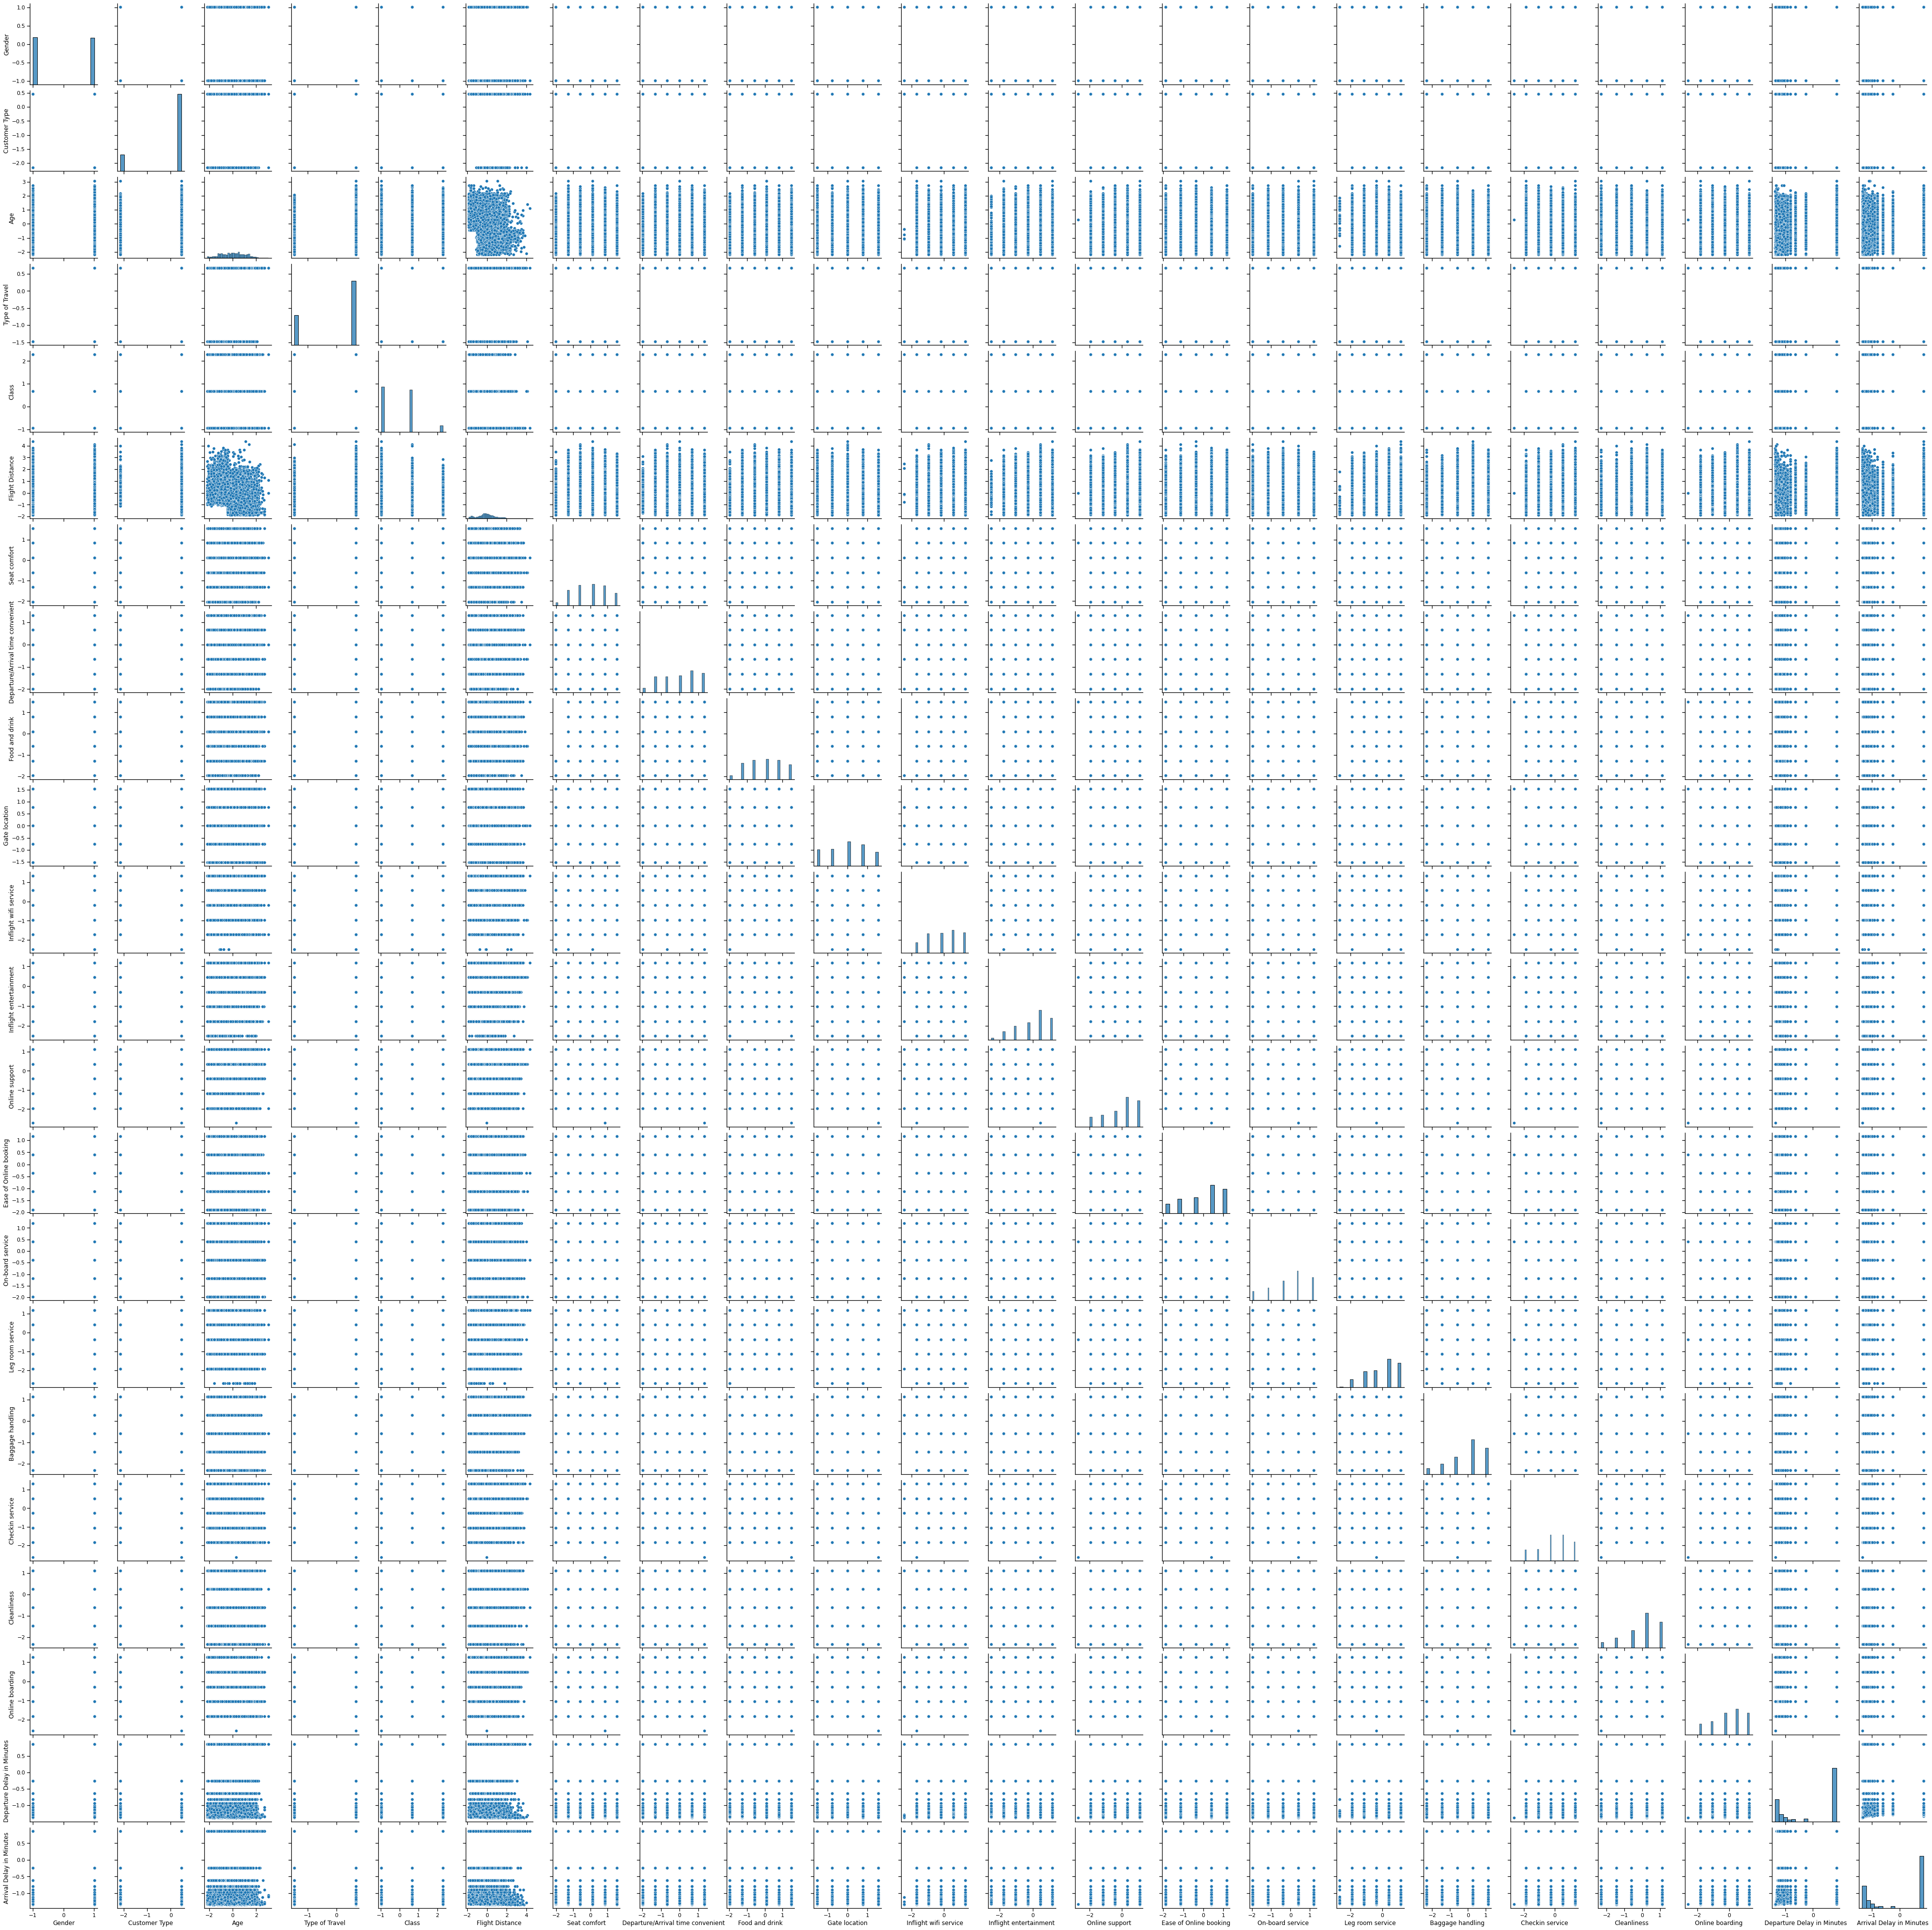

In [247]:
sns.pairplot(data)


In [30]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=42)
km = km.fit(data)

data['kmeans'] = km.predict(data)

In [31]:
data['kmeans'].value_counts()

0    5710
1    4290
Name: kmeans, dtype: int64

In [32]:
y.value_counts()

1.0    5496
0.0    4504
Name: satisfaction, dtype: int64

In [33]:
data = data.drop(columns = "kmeans")

In [34]:
kmeans = km.predict(data)

In [35]:
### BEGIN SOLUTION
# Create and fit a range of models
km_list = list()

for clust in range(1,21):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(data)
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

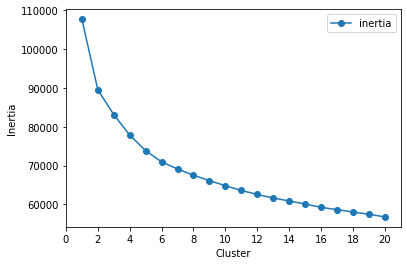

In [36]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia');
### END SOLUTION

In [37]:
from sklearn.cluster import AgglomerativeClustering
### BEGIN SOLUTION
ag = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=True)
ag = ag.fit(data)
agglom = ag.fit_predict(data)

In [40]:
pd.DataFrame(kmeans).value_counts()

0    5710
1    4290
dtype: int64

In [39]:
pd.DataFrame(agglom).value_counts()

0    5609
1    4391
dtype: int64

In [43]:
pd.DataFrame(y).value_counts()

satisfaction
1.0             5496
0.0             4504
dtype: int64

In [52]:
comparison = pd.DataFrame(columns=['y', 'agglom', 'kmeans'])

In [63]:
y

32773     1.0
74685     0.0
67864     0.0
51421     0.0
117811    1.0
         ... 
119638    1.0
108298    1.0
21685     1.0
67031     0.0
119987    1.0
Name: satisfaction, Length: 10000, dtype: float64

In [73]:
comparison = pd.DataFrame()

In [76]:
comparison["y"] = y.to_numpy()
comparison["agglom"] = agglom
comparison["kmeans"] = kmeans


In [84]:
comparison.kmeans.value_counts()

0    5710
1    4290
Name: kmeans, dtype: int64

In [88]:
bad = 0
for i in range(comparison.shape[0]):
    if comparison["y"][i] != comparison["agglom"][i]:
               bad += 1
bad

2789

In [90]:
bad = 0
for i in range(comparison.shape[0]):
    if comparison["y"][i] == comparison["kmeans"][i]:
               bad += 1
bad

2718

In [93]:
bad = 0
for i in range(comparison.shape[0]):
    if comparison["agglom"][i] == comparison["kmeans"][i]:
               bad += 1
bad

1605